## Neural Network

In [142]:
#

import numpy as np

import matplotlib.pyplot as plt

from neuralnetwork.neural_network_module import NeuralNetwork, Layer

np.random.seed(101)

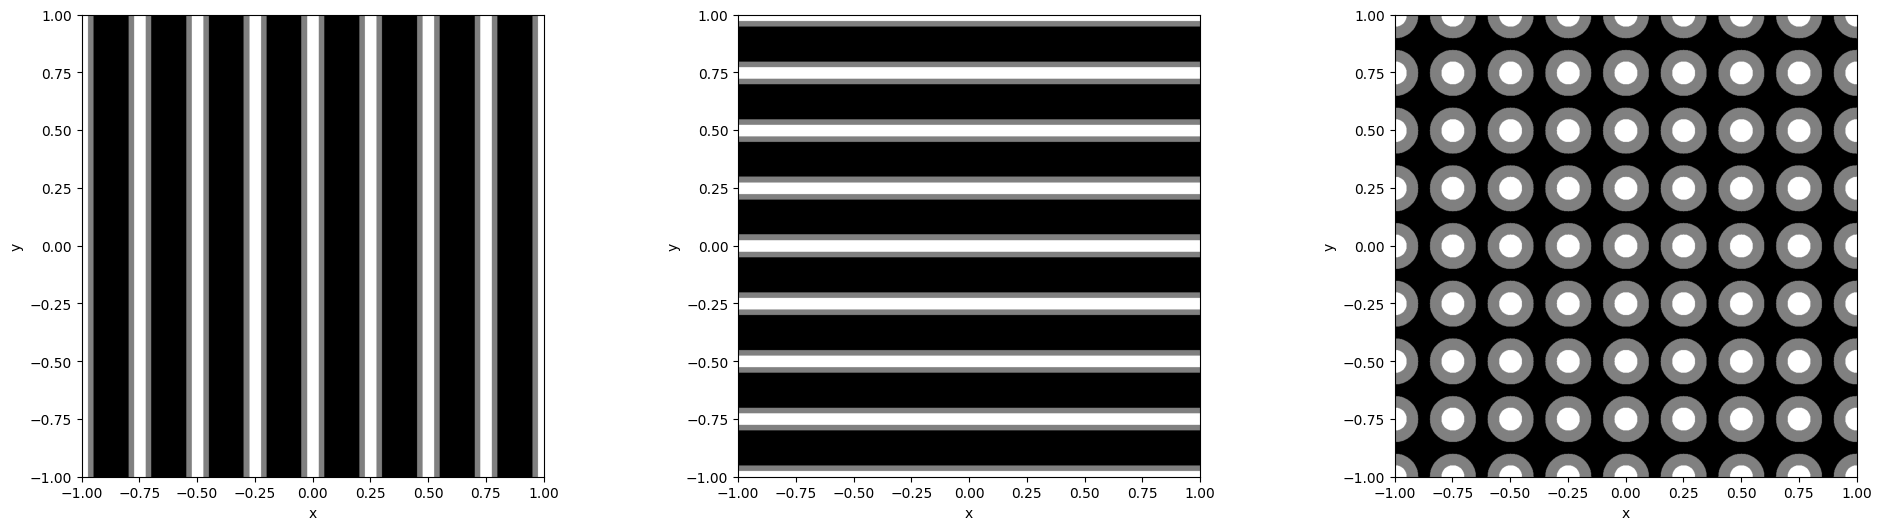

In [143]:
# Create data for sinusoid

N = int(1e4) # number of samples

xx = 2*(np.random.rand(N,2) - 0.5)

yy = np.zeros((N,3), dtype=int)



for kx in np.arange(-1,1.25,0.25):
    idx = abs(xx[:,0] - kx) <= 0.1/2
    # print(idx)
    yy[idx,0] = 1
    idx = abs(xx[:,0] - kx) <= 0.05/2
    yy[idx,0] = 2
for ky in np.arange(-1,1.25,0.25):
    idx = abs(xx[:,1] - ky) <= 0.1/2
    yy[idx,1] = 1
    idx = abs(xx[:,1] - ky) <= 0.05/2
    yy[idx,1] = 2
for kx in np.arange(-1,1.25,0.25):
    for ky in np.arange(-1,1.25,0.25):
        # idx = np.where(((xx - kx)**2 <= 0.01**2) & ((yy - ky)**2 <= 0.01**2))
        # yy[idx,2] = 1
        # idx = np.where(((xx - kx)**2 <= 0.025**2) & ((yy - ky)**2 <= 0.025**2))
        # yy[idx,2] = 2

        idx = np.where(((xx[:,0]- kx)**2 + (xx[:,1] - ky)**2 <= 0.1**2))
        yy[idx,2] = 1
        idx = np.where(((xx[:,0] - kx)**2 + (xx[:,1] - ky)**2 <= 0.05**2))
        yy[idx,2] = 2


xp, yp = np.meshgrid(np.linspace(-1,1,1001), np.linspace(-1,1,1001))
zxp = np.zeros(xp.shape)
zyp = np.zeros(xp.shape)
zxyp = np.zeros(xp.shape)
for kx in np.arange(-1,1.25,0.25):
    idx = abs(xp - kx) <= 0.1/2
    zxp[idx] = 1
    idx = abs(xp - kx) <= 0.05/2
    zxp[idx] = 2
for ky in np.arange(-1,1.25,0.25):
    idx = abs(yp - ky) <= 0.1/2
    zyp[idx] = 1
    idx = abs(yp - ky) <= 0.05/2
    zyp[idx] = 2
for kx in np.arange(-1,1.25,0.25):
    for ky in np.arange(-1,1.25,0.25):
        idx = np.where(((xp - kx)**2 <= 0.01**2) & ((yp - ky)**2 <= 0.01**2))
        zxyp[idx] = 1
        idx = np.where(((xp - kx)**2 <= 0.025**2) & ((yp - ky)**2 <= 0.025**2))
        zxyp[idx] = 2

        idx = np.where(((xp - kx)**2 + (yp - ky)**2 <= 0.1**2))
        zxyp[idx] = 1
        idx = np.where(((xp - kx)**2 + (yp - ky)**2 <= 0.05**2))
        zxyp[idx] = 2


plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
plt.imshow(zxp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,3,2)
plt.imshow(zyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,3,3)
plt.imshow(zxyp, cmap=plt.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()



# print(xx)
# print(yy)

In [144]:
#

X_train = xx[0:8000,:]
X_test = xx[8000:,:]

Y_train = yy[0:8000]
Y_test = yy[8000:]

In [145]:
#

def one_hot(Y, num_cols:int=10):
    # one_hot_Y = np.zeros((Y.shape[0], Y.max()+1))
    one_hot_Y = np.zeros((Y.shape[0], num_cols))
    one_hot_Y[np.arange(0, Y.shape[0]), Y] = 1
    return one_hot_Y

def get_predictions(A2):
    return np.argmax(A2, 1).reshape(-1,1)

def get_accuracy(Y_pred, Y):
    print("Values:", Y.T)
    print("Predictions:", Y_pred.T)    
    return np.sum(Y_pred == Y)/Y.shape[0]

def gradient_descent(NN: "NeuralNetwork", X, Y, alpha, iterations=100, intervals=10):
    # W1, b1, W2, b2 = init_params()
    for k1 in range(iterations):
        # Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        NN._compute_output(X)
        # dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        NN._train_step(X, one_hot(Y[:,0], 3), alpha)
        # W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        Y_pred = get_predictions(NN._compute_output(X))
        if k1 % intervals == 0:
            print("")
            print(f"Iteration: {k1} | Train accuracy: {get_accuracy(Y_pred, Y):0.4f}")



In [147]:
#

nn = NeuralNetwork()

layer_list = []
# layer_list.append(Layer())

nn._add_layers([Layer(2, None)])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "relu")])
nn._add_layers([Layer(16, "linear")])
nn._add_layers([Layer(3, "softmax")])

gradient_descent(nn, X_train, Y_train[:,[1]], 0.010, 1000, 100)

print("")
print("Training Complete")
print(f"Train accuracy: {get_accuracy(get_predictions(nn._compute_output(X_train)), Y_train[:,[1]]):0.4f}")
print(f"Test accuracy: {get_accuracy(get_predictions(nn._compute_output(X_test)), Y_test[:,[1]]):0.4f}")


Neural Network NN32 initialized
Layer L154 initialized | Neurons: 2 | Activation: None
Layer L155 initialized | Neurons: 16 | Activation: relu
Layer L156 initialized | Neurons: 16 | Activation: relu
Layer L157 initialized | Neurons: 16 | Activation: relu
Layer L158 initialized | Neurons: 3 | Activation: softmax

Values: [[0 0 0 ... 1 0 2]]
Predictions: [[1 1 1 ... 1 1 1]]
Iteration: 0 | Train accuracy: 0.1994

Values: [[0 0 0 ... 1 0 2]]
Predictions: [[0 0 0 ... 0 0 0]]
Iteration: 100 | Train accuracy: 0.6005

Values: [[0 0 0 ... 1 0 2]]
Predictions: [[0 0 0 ... 0 0 0]]
Iteration: 200 | Train accuracy: 0.6005

Values: [[0 0 0 ... 1 0 2]]
Predictions: [[0 0 0 ... 0 0 0]]
Iteration: 300 | Train accuracy: 0.6005

Values: [[0 0 0 ... 1 0 2]]
Predictions: [[0 0 0 ... 0 0 0]]
Iteration: 400 | Train accuracy: 0.6005

Values: [[0 0 0 ... 1 0 2]]
Predictions: [[0 0 0 ... 0 0 0]]
Iteration: 500 | Train accuracy: 0.6005

Values: [[0 0 0 ... 1 0 2]]
Predictions: [[0 0 0 ... 0 0 0]]
Iteration: 600 

In [119]:
Y_train[0:20,2:3].T

array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1]])

In [141]:

nn._compute_output(X_train)

array([[0.6009708 , 0.19410819, 0.20492101],
       [0.63060498, 0.1857074 , 0.18368762],
       [0.59639086, 0.1911579 , 0.21245123],
       ...,
       [0.59897175, 0.18868775, 0.2123405 ],
       [0.58755064, 0.19139567, 0.22105369],
       [0.61371432, 0.19304927, 0.19323641]])

In [124]:
one_hot(Y_train[:,0], 3).shape

(8000, 3)

(8000, 3)